In [25]:
#coding:utf-8
import pandas as pd

fpath = "D://数据集大荟萃/周杰伦新歌《Mojito》豆瓣短评数据集/mojito6931/1Mojito豆瓣短评数据6.12.csv"

df = pd.read_csv(fpath,engine='python')

for index,row in df.iterrows():
    print(row["content"],row["attitude"])

比前几首玩票性质的单曲当然是认真了很多。但是这个歌有任何令人惊喜的地方吗？没有，好久没听到能让人耳目一新的周杰伦了，别吹情怀，副歌部分比主歌好一点点，但新专辑估计又是最近几张的彩色调，周郎才尽其实不丢人，毕竟不能渴求创作者一直保持高水准。 0
建议周杰伦老老实实过婚后生活吧，演唱会水时长，发新歌感觉纯粹为了去古巴旅游顺便拍了个vlog，18年前开始听歌的老路人粉表示这样下去真的在自作自糊。40岁的人了，赚点体面钱吧。一星底线，一星给点体面。 0
二十年铁粉夏日落泪。一个有趣的小知识，如果有人吐槽「周郎才尽」足够早，到今天也差不多十五年了。十五年，批评的角度还是日趋固化的「不新鲜」和「乏味」，会不会显得比自己的评判对象还迂腐。早点儿接受文艺作品的黄金年代（也就是大部分人的青年时期）过去了不会再来，对新的作品接受程度能大幅提升。固守成见的人喜欢说「迷迭香」不知道高到哪里去了，乐观的朋友则欣喜地在听新的「迷迭香」。 1
属于那种Spotify 新歌推送，听到会直接切走的歌 0
比前几首好很多了，但还没有达到周杰伦的正常水平。感觉他的问题是生活太滋润了，没有早年的伤春悲秋，烦恼才是创作的源泉。早年专辑里强烈的情绪色彩是能够直接感受得到的，忧郁的，愤怒的，狂躁的，被爱情折磨的，这些都成为他的素材，这点像Taylorswift一直保持得很好，但杰伦现在反倒是被美满的生活打成一杯温吞的白开水。只希望专辑出来有惊喜吧。 0
欢迎回来 Havana去了两次 看杰伦在Havana漫步居然格外亲切 2
中规中矩。小公举这次唯一聪明的一点是，他自己大概也看到了老流行套路自己的创作瓶颈，于是尝试风格切换，套用极具异域特色的地方街头艺人偶尔迸发的旋律和乐器编排作为灵感借鉴，“创作”出了一张对于他现在的歌迷来说“从未听过的”，“新鲜拉丁风格”的流水线作品。（接受网友建议，把中间与这句音乐无关的评论删了）但他似乎也忘了，或者不在乎这种策略带来的两头不讨好：本质粉觉得不流行，懂拉丁的要么觉得非常普通套路，要么排斥这种四不像。只有平时根本不听拉丁风格的人，才会觉得“哇，好惊喜，质量好高！”所以归根结底，还是在做脑残粉的生意，因为他们大概忘了，或者根本就不记得小公举很早就有《迷迭香》这样的珠玉在前了 / 2020.6.12 00:12，209人评分9.0. 1
我本来听得挺高兴的，一看豆瓣评论又有点不高

In [13]:
from snownlp import SnowNLP

text1 = '这个东西不错'
text2 = '这个东西很垃圾'

s1 = SnowNLP(text1)
s2 = SnowNLP(text2)

print(s1.sentiments,s2.sentiments)

0.8623218777387431 0.21406279508712744


In [14]:
def snow_result(comment):
    s = SnowNLP(comment)
    if s.sentiments >= 0.7:
        return 2
    elif s.sentiments >=0.4:
        return 1
    else:
        return 0

   
df["snlp_result"] = df.content.apply(snow_result)


In [15]:
# 预测正确的个数/总个数=0.37
right = 0
total = 100

i=0
for index,row in df.iterrows():
    if i>100:
        break
    if row["attitude"]==int(row["snlp_result"]):
        right+=1
    i = i+1
    
print(right/total)

0.38


In [75]:
# 还是屈服于分词啊哈哈哈
import jieba

def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

df['cut_content'] = df.content.apply(chinese_word_cut)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zoe\AppData\Local\Temp\jieba.cache
Loading model cost 0.565 seconds.
Prefix dict has been built successfully.


In [4]:
df.head()
df['cut_content']

0      比前 几首 玩票性质 的 单曲 当然 是 认真 了 很多 。 但是 这个 歌有 任何 令人 ...
1      建议 周杰伦 老老实实 过 婚后 生活 吧 ， 演唱会 水时长 ， 发新歌 感觉 纯粹 为了...
2      二十年 铁粉 夏日 落泪 。 一个 有趣 的 小 知识 ， 如果 有人 吐槽 「 周郎 才 ...
3               属于 那种 Spotify   新 歌 推送 ， 听到 会 直接 切 走 的 歌
4      比前 几首 好 很多 了 ， 但 还 没有 达到 周杰伦 的 正常 水平 。 感觉 他 的 ...
                             ...                        
493                          MV 的 他 还 蛮帅 的   但歌 也 就 那样 ⑧
494                                                 中规中矩
495                                 小 公举 那些 颜色 鲜艳 的 衬衫 。
496    看 和 谁 比 了 ， 比前 几张 单曲 强 很多 ， 但是 和 他 自己 来 比 ， 这张...
497               70 / / 能 及格 / / 我 对 主流 华语 乐坛 要求 就 这样 了
Name: cut_content, Length: 498, dtype: object

In [17]:
# 划分数据集
X = df["cut_content"]
y = df.attitude

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [41]:
X_train, X_test, y_train, y_test

(449                                            有 以前 内味 了
 333                                     多一星 给 副歌 ， 就 酱 。
 469                                   听过 了 ， 就 完事 了 那种 。
 450                                                 无趣 。
 56                                 ? ? 老年人 出歌 是 慢 了 一点 ～
                              ...                        
 356    没 啥 新意 ， 又 很 朴素 。 主要 对 他 期望 一直 很 高 。 讲道理 按 他 这...
 448                              比 之前 几首 好多 了 ， 轻轻松松 的 。
 300                                               三星 半 ？
 132    醉心 拉美 文化 的 我 必须 极尽 赞美 地 夸 。 终于 又 见 类似 10 年代 初 ...
 373    我 为了 杰伦开 了 扣扣 音乐 会员   然后 建了 一个 歌单   然后 加歌 进去 的...
 Name: cut_content, Length: 398, dtype: object,
 286    调调 还 行   但 也 是 蜜汁 熟悉 的 感觉   歌词 就 不 评论 了 -   - ...
 391                                          是 好听 的 ～ 喜欢
 237                                         超级 洗脑 ， 无法自拔
 31           2.5 主歌 听 了 两句 就 知道 是 套路 。 下 一个 和弦 都 能 猜 到 。
 303                                         hin 一般 吧 … …
                        

In [18]:
# 词向量
from sklearn.feature_extraction.text import CountVectorizer

def get_custom_stopwords(stop_words_file):
    with open(stop_words_file,encoding='utf-8') as f:
        stopwords = f.read()
    stopwords_list = stopwords.split('\n')
    custom_stopwords_list = [i for i in stopwords_list]
    return custom_stopwords_list

stop_words_file = 'D:\文本数据预处理常用工具\stopwords-master\hit_stopwords.txt'
stopwords = get_custom_stopwords(stop_words_file)

vect = CountVectorizer(max_df = 0.9, 
                       min_df = 3, 
                       token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b', 
                       stop_words=frozenset(stopwords))

In [19]:
test = pd.DataFrame(vect.fit_transform(X_train).toarray(), columns=vect.get_feature_names())
test

s:\python38\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['exp', 'lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


havana  hhhh  jay  mojito  mv  pop  rap  vlog  vocal  一下  ...  难看  需要  \
0         0     0    0       0   0    0    0     0      0   0  ...   0   0   
1         0     0    0       0   0    0    0     0      0   0  ...   0   0   
2         0     0    0       0   0    0    0     0      0   0  ...   0   0   
3         0     0    0       0   0    0    0     0      0   0  ...   0   0   
4         0     0    0       0   0    0    0     0      0   0  ...   0   0   
..      ...   ...  ...     ...  ..  ...  ...   ...    ...  ..  ...  ..  ..   
393       0     1    0       0   0    0    0     0      0   0  ...   0   0   
394       0     0    0       0   0    0    0     0      0   0  ...   0   0   
395       0     0    0       0   0    0    0     0      0   0  ...   0   0   
396       1     0    0       0   0    0    1     0      0   0  ...   0   0   
397       0     0    0       0   0    0    0     0      0   0  ...   0   0   

     青春  非常  音乐  顺便  风情  风格  首歌  黄俊郎  
0     0   0   0   0   0   0   0    0  
1     0   0   0   0   0   0   0    0  
2     0   0   0   0   0   0   0    0  
3     0   0   0   0   0   0   0    0  
4     0   0   0   0   0   0   0    0  
..   ..  ..  ..  ..  ..  ..  ..  ...  
393   0   1   0   0   0   0   0    0  
394   0   0   0   0   0   0   0    0  
395   0   0   0   0   0   0   0    0  
396   0   0   2   0   1   1   0    0  
397   1   0   1   0   0   0   0    0  

[398 rows x 277 columns]

In [20]:
# 朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

X_train_vect = vect.fit_transform(X_train)
nb.fit(X_train_vect, y_train)
train_score = nb.score(X_train_vect, y_train)
print(train_score)

0.7361809045226131


In [23]:
X_vec = vect.transform(X)
nb_result = nb.predict(X_vec)
df['nb_result'] = nb_result

df

user_name                                     user_url  \
0         锐利修蕊   https://www.douban.com/people/ruilixiurui/   
1       twotwo  https://www.douban.com/people/GuanRenWoYao/   
2        Costi         https://www.douban.com/people/costi/   
3        Santé      https://www.douban.com/people/trueGugi/   
4          月山行          https://www.douban.com/people/xmns/   
..         ...                                          ...   
493    上帝怀里的汤姆     https://www.douban.com/people/202231787/   
494     Andrew     https://www.douban.com/people/189738941/   
495  ??Gabriel       https://www.douban.com/people/mshushu/   
496         倾葵      https://www.douban.com/people/49172586/   
497   DAS_Anac     https://www.douban.com/people/185431233/   

                      rating_num comment_time  \
0    user-stars allstar20 rating    2020/6/12   
1    user-stars allstar20 rating    2020/6/12   
2    user-stars allstar50 rating    2020/6/12   
3                            NaN    2020/6/12   
4                            NaN    2020/6/12   
..                           ...          ...   
493  user-stars allstar20 rating    2020/6/12   
494  user-stars allstar30 rating    2020/6/12   
495  user-stars allstar30 rating    2020/6/12   
496  user-stars allstar40 rating    2020/6/12   
497  user-stars allstar30 rating    2020/6/12   

                                               content  vote_count  attitude  \
0    比前几首玩票性质的单曲当然是认真了很多。但是这个歌有任何令人惊喜的地方吗？没有，好久没听到能...        1238         0   
1    建议周杰伦老老实实过婚后生活吧，演唱会水时长，发新歌感觉纯粹为了去古巴旅游顺便拍了个vlog...        1038         0   
2    二十年铁粉夏日落泪。一个有趣的小知识，如果有人吐槽「周郎才尽」足够早，到今天也差不多十五年了...         930         1   
3                           属于那种Spotify 新歌推送，听到会直接切走的歌         259         0   
4    比前几首好很多了，但还没有达到周杰伦的正常水平。感觉他的问题是生活太滋润了，没有早年的伤春悲...         122         0   
..                                                 ...         ...       ...   
493                                   MV的他还蛮帅的 但歌也就那样⑧           1         1   
494                                               中规中矩           1         1   
495                                      小公举那些颜色鲜艳的衬衫。           0         1   
496  看和谁比了，比前几张单曲强很多，但是和他自己来比，这张也就是普通水平，插入的rap有点突兀。...           0         1   
497                            70//能及格//我对主流华语乐坛要求就这样了           1         1   

     snlp_result                                        cut_content  nb_result  
0              2  比前 几首 玩票性质 的 单曲 当然 是 认真 了 很多 。 但是 这个 歌有 任何 令人 ...          0  
1              0  建议 周杰伦 老老实实 过 婚后 生活 吧 ， 演唱会 水时长 ， 发新歌 感觉 纯粹 为了...          0  
2              2  二十年 铁粉 夏日 落泪 。 一个 有趣 的 小 知识 ， 如果 有人 吐槽 「 周郎 才 ...          0  
3              2           属于 那种 Spotify   新 歌 推送 ， 听到 会 直接 切 走 的 歌          0  
4              2  比前 几首 好 很多 了 ， 但 还 没有 达到 周杰伦 的 正常 水平 。 感觉 他 的 ...          0  
..           ...                                                ...        ...  
493            1                        MV 的 他 还 蛮帅 的   但歌 也 就 那样 ⑧          0  
494            2                                               中规中矩          1  
495            0                               小 公举 那些 颜色 鲜艳 的 衬衫 。          1  
496            2  看 和 谁 比 了 ， 比前 几张 单曲 强 很多 ， 但是 和 他 自己 来 比 ， 这张...          2  
497            0             70 / / 能 及格 / / 我 对 主流 华语 乐坛 要求 就 这样 了          1  

[498 rows x 10 columns]

In [33]:
atti_dict = {}
for item in df.loc[:,'attitude'].value_counts():
    print(item.name)
#     atti_dict[item[0]]=item[1]

AttributeError: 'int' object has no attribute 'name'

In [63]:
# res = df['attitude'].value_counts(normalize=True)
res = df['attitude'].value_counts()
label_dict = {0:"不喜欢",1:"中立",2:"喜欢"}
x = []
y = []

for i,v in res.items():
    print('index:',i,'value:',v)
    x.append(label_dict[i])
    y.append(v)

index: 0 value: 229
index: 1 value: 150
index: 2 value: 119


No handles with labels found to put in legend.


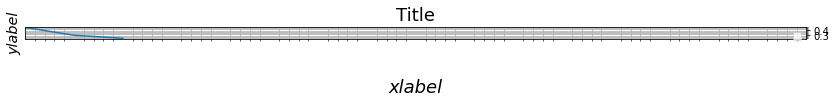

In [38]:
# 知乎学习https://zhuanlan.zhihu.com/p/93423829

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(x,y)

ax.set_title('Title',fontsize=18)
ax.set_xlabel('xlabel',fontsize=18,fontfamily = 'sans-serif',fontstyle = 'italic')
ax.set_ylabel('ylabel',fontsize='x-large',fontstyle='oblique')
ax.legend()

# xy坐标轴的一些属性设定
ax.set_aspect('equal') 
ax.minorticks_on() 
ax.set_xlim(0,16) 
ax.grid(which='minor', axis='both')

# 坐标轴tick和细节，这个在axes.xaxis or axes.yaxis上完成
ax.xaxis.set_tick_params(rotation=45,labelsize=18,colors='w') 
start, end = ax.get_xlim() 
ax.xaxis.set_ticks(np.arange(start, end,1)) 
ax.yaxis.tick_right()

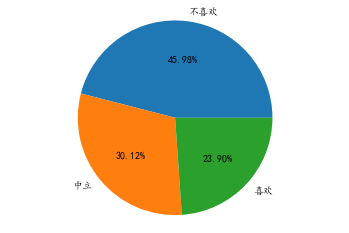

In [64]:
# 绘制 三种态度 饼图
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

fig1, ax1 = plt.subplots()

ax1.pie(y,labels=x,autopct='%1.2f%%')

# x,y轴长度相同
ax1.axis('equal')

plt.savefig('D:/mojito/atti_bing.jpg',dpi=300)
plt.show()

In [47]:
df

user_name                                     user_url  \
0         锐利修蕊   https://www.douban.com/people/ruilixiurui/   
1       twotwo  https://www.douban.com/people/GuanRenWoYao/   
2        Costi         https://www.douban.com/people/costi/   
3        Santé      https://www.douban.com/people/trueGugi/   
4          月山行          https://www.douban.com/people/xmns/   
..         ...                                          ...   
493    上帝怀里的汤姆     https://www.douban.com/people/202231787/   
494     Andrew     https://www.douban.com/people/189738941/   
495  ??Gabriel       https://www.douban.com/people/mshushu/   
496         倾葵      https://www.douban.com/people/49172586/   
497   DAS_Anac     https://www.douban.com/people/185431233/   

                      rating_num comment_time  \
0    user-stars allstar20 rating    2020/6/12   
1    user-stars allstar20 rating    2020/6/12   
2    user-stars allstar50 rating    2020/6/12   
3                            NaN    2020/6/12   
4                            NaN    2020/6/12   
..                           ...          ...   
493  user-stars allstar20 rating    2020/6/12   
494  user-stars allstar30 rating    2020/6/12   
495  user-stars allstar30 rating    2020/6/12   
496  user-stars allstar40 rating    2020/6/12   
497  user-stars allstar30 rating    2020/6/12   

                                               content  vote_count  attitude  \
0    比前几首玩票性质的单曲当然是认真了很多。但是这个歌有任何令人惊喜的地方吗？没有，好久没听到能...        1238         0   
1    建议周杰伦老老实实过婚后生活吧，演唱会水时长，发新歌感觉纯粹为了去古巴旅游顺便拍了个vlog...        1038         0   
2    二十年铁粉夏日落泪。一个有趣的小知识，如果有人吐槽「周郎才尽」足够早，到今天也差不多十五年了...         930         1   
3                           属于那种Spotify 新歌推送，听到会直接切走的歌         259         0   
4    比前几首好很多了，但还没有达到周杰伦的正常水平。感觉他的问题是生活太滋润了，没有早年的伤春悲...         122         0   
..                                                 ...         ...       ...   
493                                   MV的他还蛮帅的 但歌也就那样⑧           1         1   
494                                               中规中矩           1         1   
495                                      小公举那些颜色鲜艳的衬衫。           0         1   
496  看和谁比了，比前几张单曲强很多，但是和他自己来比，这张也就是普通水平，插入的rap有点突兀。...           0         1   
497                            70//能及格//我对主流华语乐坛要求就这样了           1         1   

     snlp_result                                        cut_content  nb_result  
0              2  比前 几首 玩票性质 的 单曲 当然 是 认真 了 很多 。 但是 这个 歌有 任何 令人 ...          0  
1              0  建议 周杰伦 老老实实 过 婚后 生活 吧 ， 演唱会 水时长 ， 发新歌 感觉 纯粹 为了...          0  
2              2  二十年 铁粉 夏日 落泪 。 一个 有趣 的 小 知识 ， 如果 有人 吐槽 「 周郎 才 ...          0  
3              2           属于 那种 Spotify   新 歌 推送 ， 听到 会 直接 切 走 的 歌          0  
4              2  比前 几首 好 很多 了 ， 但 还 没有 达到 周杰伦 的 正常 水平 。 感觉 他 的 ...          0  
..           ...                                                ...        ...  
493            1                        MV 的 他 还 蛮帅 的   但歌 也 就 那样 ⑧          0  
494            2                                               中规中矩          1  
495            0                               小 公举 那些 颜色 鲜艳 的 衬衫 。          1  
496            2  看 和 谁 比 了 ， 比前 几张 单曲 强 很多 ， 但是 和 他 自己 来 比 ， 这张...          2  
497            0             70 / / 能 及格 / / 我 对 主流 华语 乐坛 要求 就 这样 了          1  

[498 rows x 10 columns]

In [65]:
vote_dict = {0:0,1:0,2:0}
for index,row in df.iterrows():
#     print(row['vote_count'],row['attitude'])
    vote_dict[row['attitude']]+=row['vote_count']
    
vote_dict

{0: 4867, 1: 3409, 2: 1646}

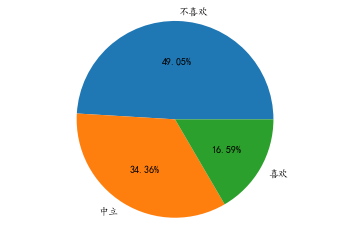

In [66]:
# 绘制饼图：统计各类投票数占比

fig2, ax2 = plt.subplots()

ax2.pie(vote_dict.values(),labels=x,autopct='%1.2f%%')

# x,y轴长度相同
ax2.axis('equal')
plt.savefig('D:/mojito/atti_bing.jpg',dpi=300)
plt.show()

In [92]:
# 得到最高赞的10个评论和态度
df.sort_values(by="vote_count",ascending=False)[:10]
df["content"][9]

'啊，中间的那段rap，老子的青春回来了…'

In [67]:
# 得到最高赞的10个评论和态度
maxvote_df_10 = df.sort_values(by="vote_count",ascending=False)[:10]

maxvote_dict = {}

for index,row in maxvote_df_10.iterrows():
    print(row["vote_count"],row["attitude"])
    maxvote_dict[row["vote_count"]] = label_dict[row["attitude"]]

1238 0
1038 0
930 1
597 1
575 1
542 1
361 2
259 0
249 1
246 0


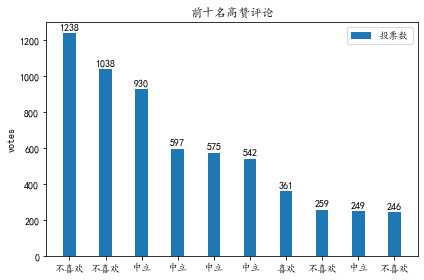

In [68]:
# 绘制柱状图
labels = maxvote_dict.values()
votes = maxvote_dict.keys()

x = np.arange(10)
width = 0.35

fig3,ax3 = plt.subplots()
rects = ax3.bar(x,votes,width,label = '投票数')

ax3.set_ylabel('votes')
ax3.set_title('前十名高赞评论')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
ax3.legend()

# 在柱顶加具体投票数
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax3.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



autolabel(rects)
    
fig3.tight_layout()

plt.savefig('D:/mojito/max10_zhu.jpg',dpi=300)
plt.show()

In [77]:
allcontent = ""
for index,row in df.iterrows():
    allcontent+=row['content']
    
allcontent

'比前几首玩票性质的单曲当然是认真了很多。但是这个歌有任何令人惊喜的地方吗？没有，好久没听到能让人耳目一新的周杰伦了，别吹情怀，副歌部分比主歌好一点点，但新专辑估计又是最近几张的彩色调，周郎才尽其实不丢人，毕竟不能渴求创作者一直保持高水准。建议周杰伦老老实实过婚后生活吧，演唱会水时长，发新歌感觉纯粹为了去古巴旅游顺便拍了个vlog，18年前开始听歌的老路人粉表示这样下去真的在自作自糊。40岁的人了，赚点体面钱吧。一星底线，一星给点体面。二十年铁粉夏日落泪。一个有趣的小知识，如果有人吐槽「周郎才尽」足够早，到今天也差不多十五年了。十五年，批评的角度还是日趋固化的「不新鲜」和「乏味」，会不会显得比自己的评判对象还迂腐。早点儿接受文艺作品的黄金年代（也就是大部分人的青年时期）过去了不会再来，对新的作品接受程度能大幅提升。固守成见的人喜欢说「迷迭香」不知道高到哪里去了，乐观的朋友则欣喜地在听新的「迷迭香」。属于那种Spotify 新歌推送，听到会直接切走的歌比前几首好很多了，但还没有达到周杰伦的正常水平。感觉他的问题是生活太滋润了，没有早年的伤春悲秋，烦恼才是创作的源泉。早年专辑里强烈的情绪色彩是能够直接感受得到的，忧郁的，愤怒的，狂躁的，被爱情折磨的，这些都成为他的素材，这点像Taylorswift一直保持得很好，但杰伦现在反倒是被美满的生活打成一杯温吞的白开水。只希望专辑出来有惊喜吧。欢迎回来 Havana去了两次 看杰伦在Havana漫步居然格外亲切中规中矩。小公举这次唯一聪明的一点是，他自己大概也看到了老流行套路自己的创作瓶颈，于是尝试风格切换，套用极具异域特色的地方街头艺人偶尔迸发的旋律和乐器编排作为灵感借鉴，“创作”出了一张对于他现在的歌迷来说“从未听过的”，“新鲜拉丁风格”的流水线作品。（接受网友建议，把中间与这句音乐无关的评论删了）但他似乎也忘了，或者不在乎这种策略带来的两头不讨好：本质粉觉得不流行，懂拉丁的要么觉得非常普通套路，要么排斥这种四不像。只有平时根本不听拉丁风格的人，才会觉得“哇，好惊喜，质量好高！”所以归根结底，还是在做脑残粉的生意，因为他们大概忘了，或者根本就不记得小公举很早就有《迷迭香》这样的珠玉在前了 / 2020.6.12 00:12，209人评分9.0.我本来听得挺高兴的，一看豆瓣评论又有点不高兴了（抠鼻救命周杰伦真的好油腻我不行了 

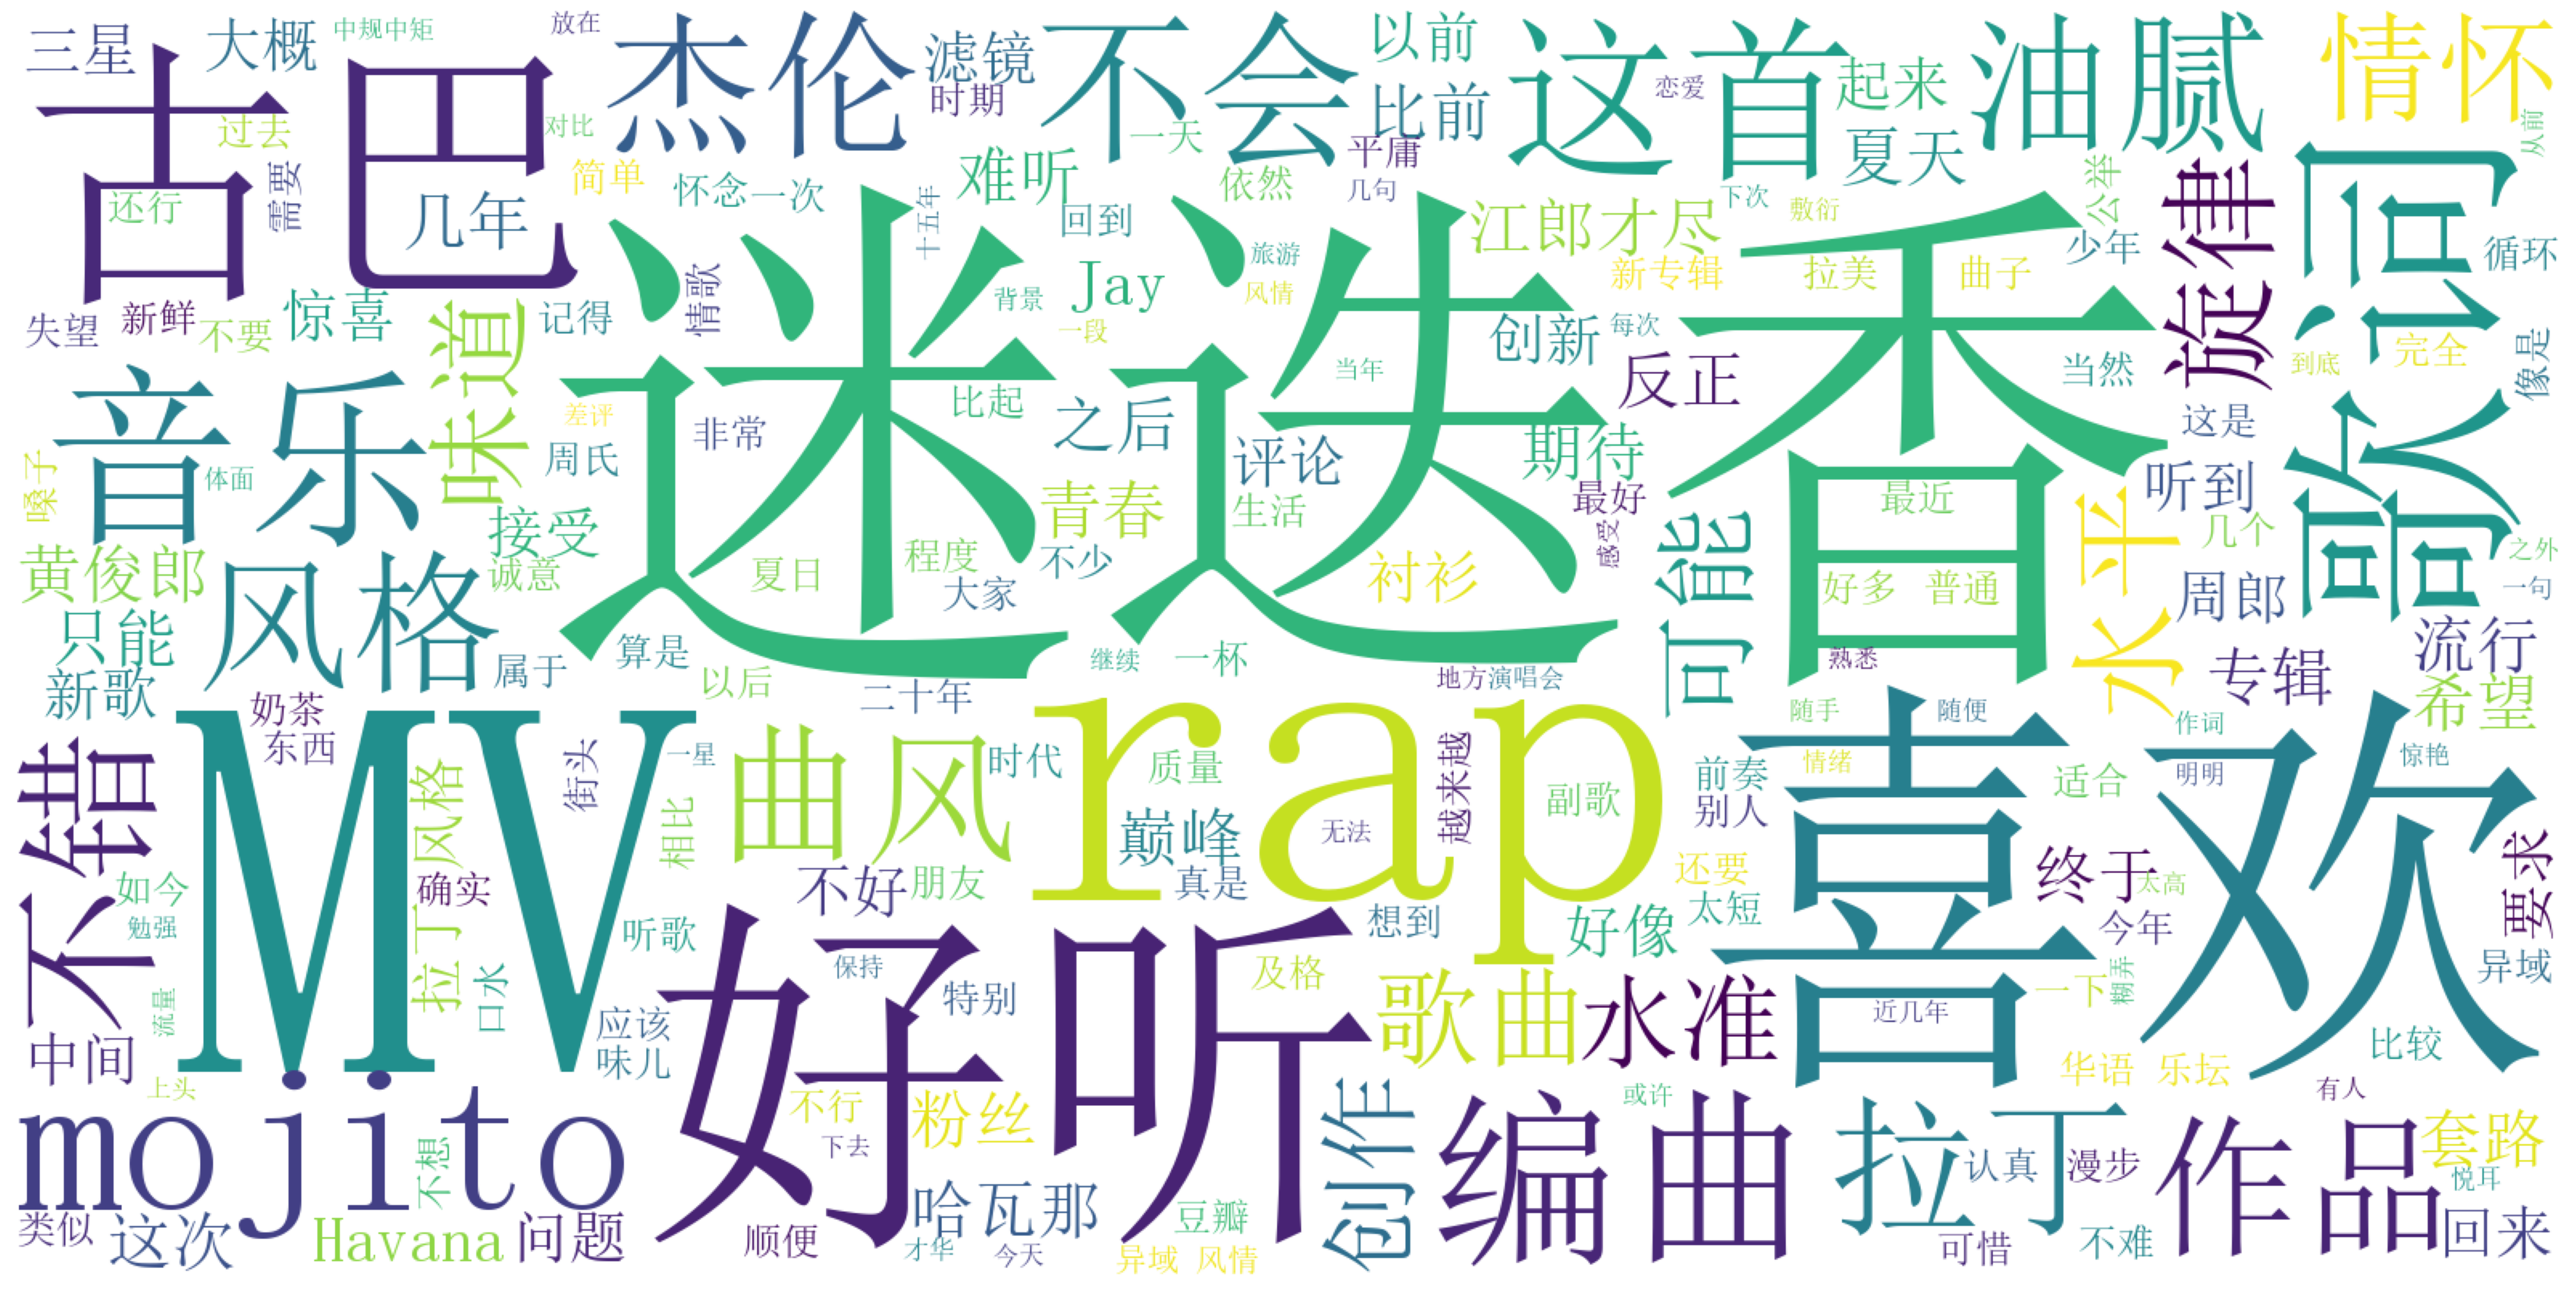

In [78]:
# [所有content]绘制词云
from wordcloud import WordCloud as wc

text_cut = jieba.lcut(allcontent)
text_cut = ' '.join(text_cut)

stop_words_file = 'D:\文本数据预处理常用工具\stopwords-master\hit_stopwords.txt'
stop_words = open(stop_words_file,encoding="utf8").read().split("\n")

word_cloud = wc(font_path="simsun.ttc",
               background_color="white", stopwords=stop_words,scale=4)

word_cloud.generate(text_cut)

plt.subplots(figsize=(72,64))

plt.imshow(word_cloud)

plt.axis("off")

plt.savefig('D:/all_wordcloud.jpg')

In [80]:
max10_content = ""

for index,row in maxvote_df_10.iterrows():
    max10_content+=row["content"]
    
max10_content

'比前几首玩票性质的单曲当然是认真了很多。但是这个歌有任何令人惊喜的地方吗？没有，好久没听到能让人耳目一新的周杰伦了，别吹情怀，副歌部分比主歌好一点点，但新专辑估计又是最近几张的彩色调，周郎才尽其实不丢人，毕竟不能渴求创作者一直保持高水准。建议周杰伦老老实实过婚后生活吧，演唱会水时长，发新歌感觉纯粹为了去古巴旅游顺便拍了个vlog，18年前开始听歌的老路人粉表示这样下去真的在自作自糊。40岁的人了，赚点体面钱吧。一星底线，一星给点体面。二十年铁粉夏日落泪。一个有趣的小知识，如果有人吐槽「周郎才尽」足够早，到今天也差不多十五年了。十五年，批评的角度还是日趋固化的「不新鲜」和「乏味」，会不会显得比自己的评判对象还迂腐。早点儿接受文艺作品的黄金年代（也就是大部分人的青年时期）过去了不会再来，对新的作品接受程度能大幅提升。固守成见的人喜欢说「迷迭香」不知道高到哪里去了，乐观的朋友则欣喜地在听新的「迷迭香」。中规中矩。小公举这次唯一聪明的一点是，他自己大概也看到了老流行套路自己的创作瓶颈，于是尝试风格切换，套用极具异域特色的地方街头艺人偶尔迸发的旋律和乐器编排作为灵感借鉴，“创作”出了一张对于他现在的歌迷来说“从未听过的”，“新鲜拉丁风格”的流水线作品。（接受网友建议，把中间与这句音乐无关的评论删了）但他似乎也忘了，或者不在乎这种策略带来的两头不讨好：本质粉觉得不流行，懂拉丁的要么觉得非常普通套路，要么排斥这种四不像。只有平时根本不听拉丁风格的人，才会觉得“哇，好惊喜，质量好高！”所以归根结底，还是在做脑残粉的生意，因为他们大概忘了，或者根本就不记得小公举很早就有《迷迭香》这样的珠玉在前了 / 2020.6.12 00:12，209人评分9.0.周郎才尽虽迟但到，周郎才尽不尽不知道，但你们的话术倒是才尽了，下次换一套说不定效果奇佳我本来听得挺高兴的，一看豆瓣评论又有点不高兴了（抠鼻这首真还行，比前几首强多了。属于那种Spotify 新歌推送，听到会直接切走的歌食之无味，弃之不可惜。就这样？？？简单芭乐歌曲一首，来来回回就那么几段起伏，再加上几句rap，旋律编曲太套路了，歌词配合MV腻味得很。从前怎么样也没想到有一天周杰伦会和「油腻」「低龄」这些字眼挂上钩，然而他真做到了。呃，他还是回去帮他老婆卖美瞳吧。'

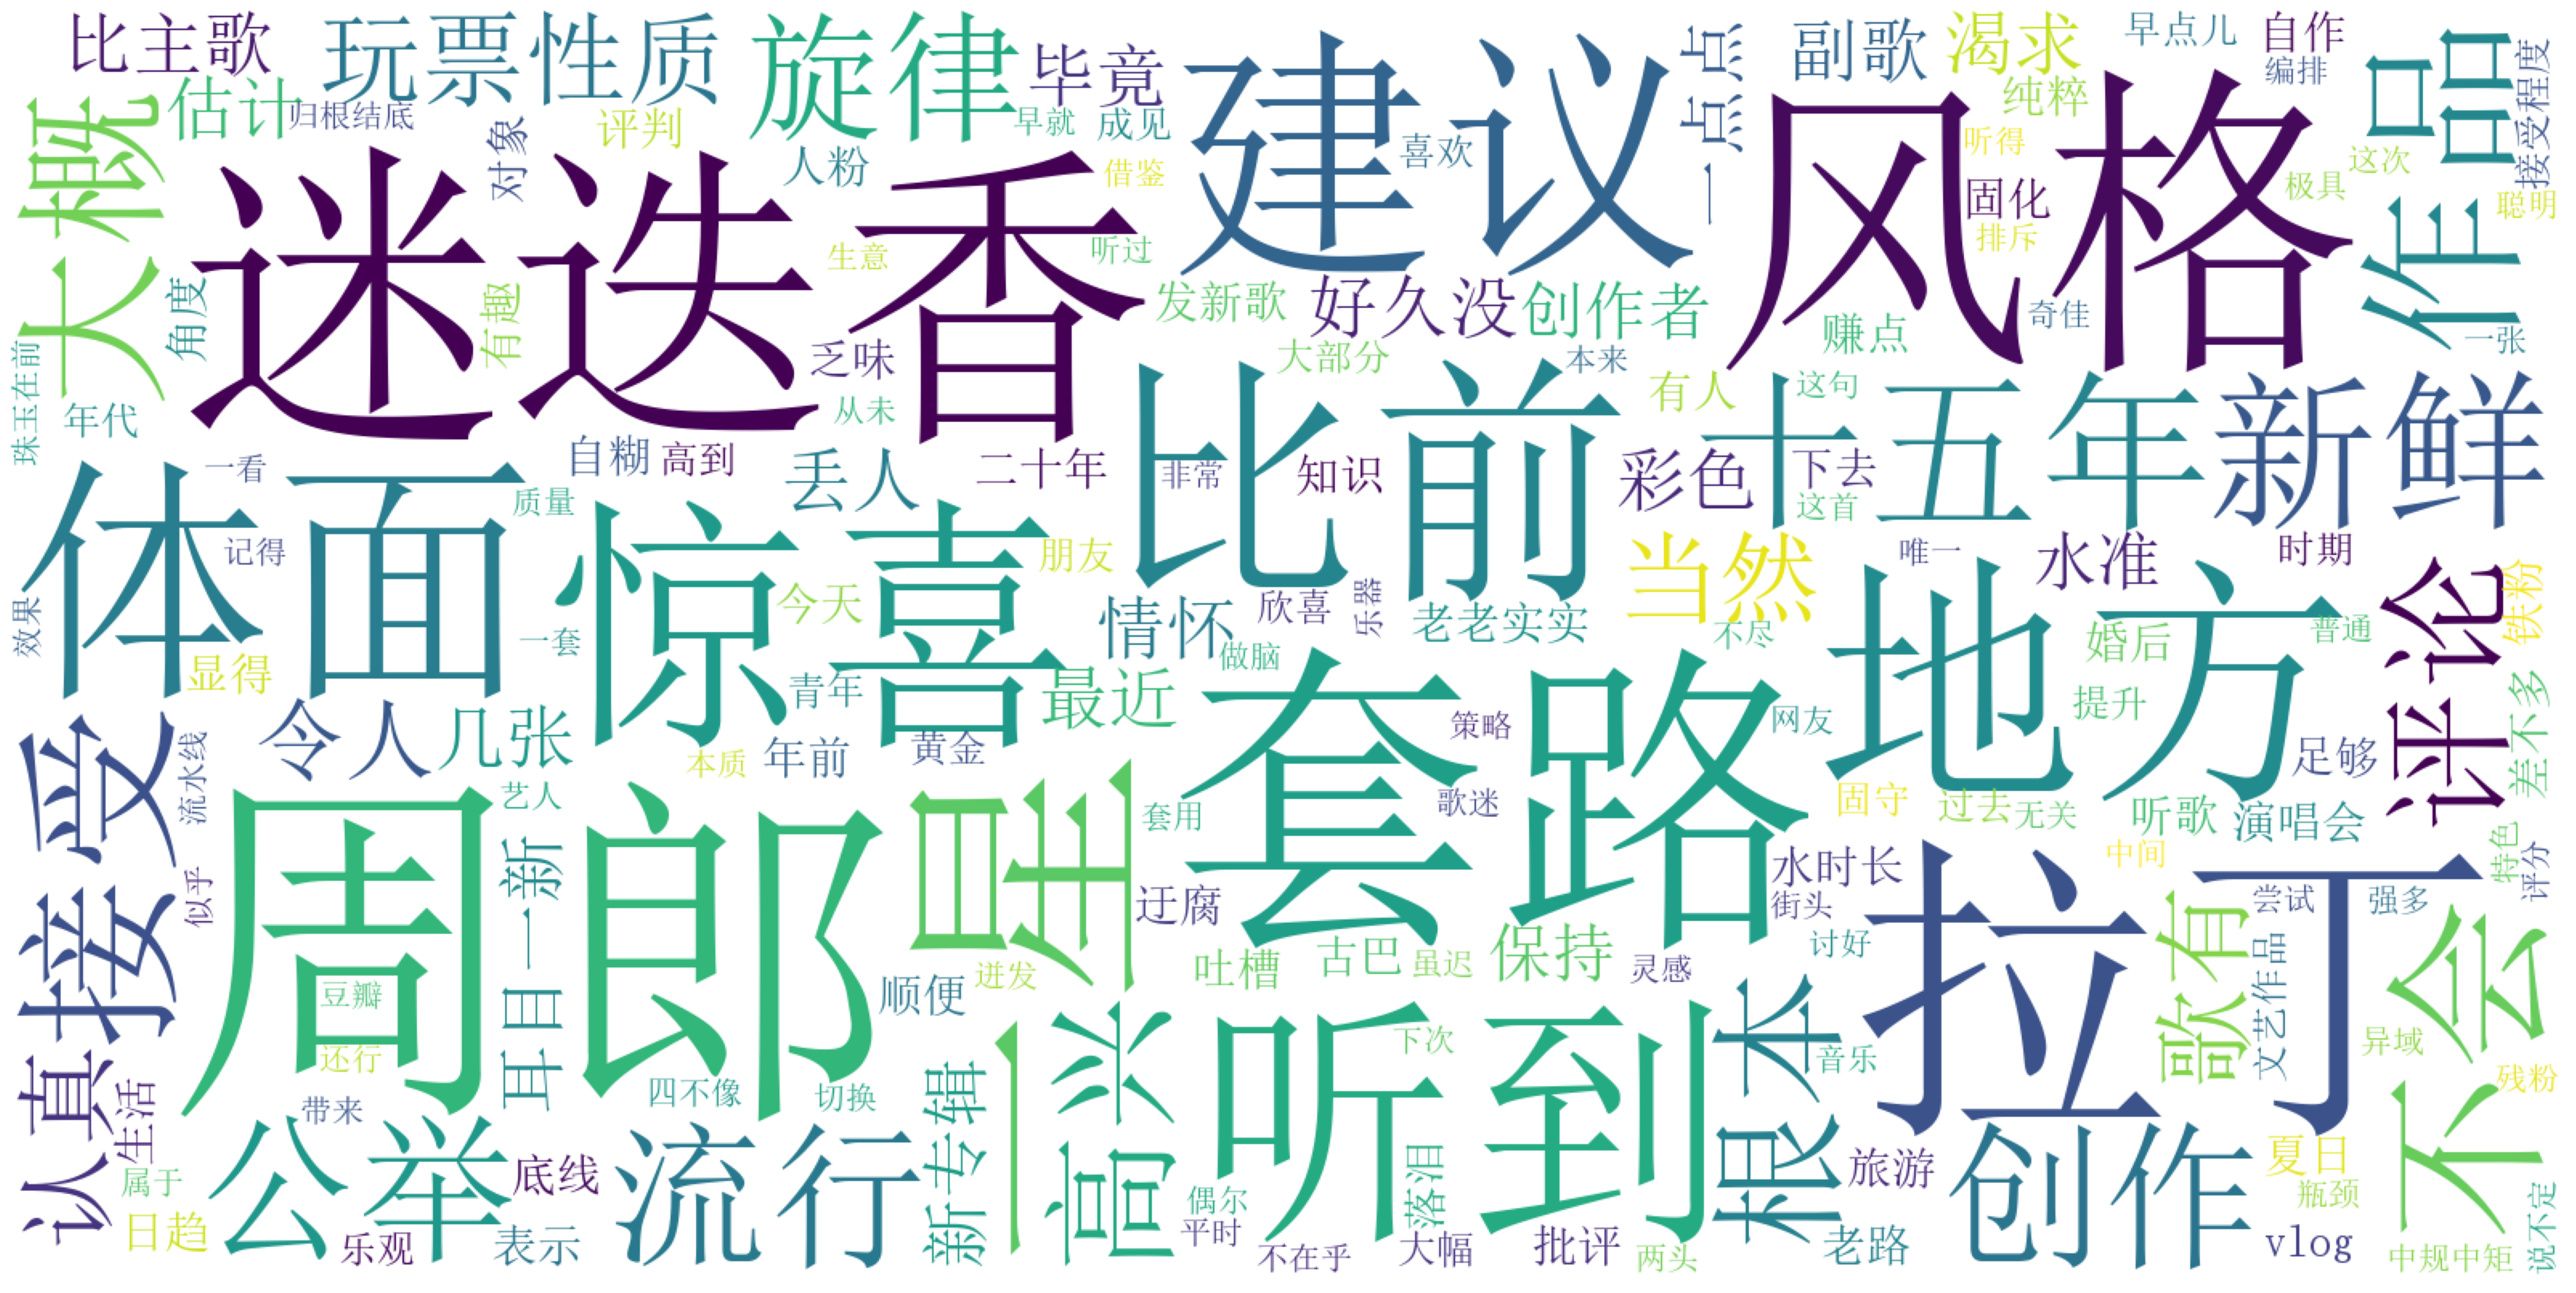

In [82]:
text_cut = jieba.lcut(max10_content)
text_cut = ' '.join(text_cut)

stop_words_file = 'D:\文本数据预处理常用工具\stopwords-master\hit_stopwords.txt'
stop_words = open(stop_words_file,encoding="utf8").read().split("\n")

word_cloud = wc(font_path="simsun.ttc",
               background_color="white", stopwords=stop_words,scale=4)

word_cloud.generate(text_cut)

plt.subplots(figsize=(72,64))

plt.imshow(word_cloud)

plt.axis("off")

plt.savefig('D:/max10_wordcloud.jpg')

In [26]:
df

user_name                                     user_url  \
0         锐利修蕊   https://www.douban.com/people/ruilixiurui/   
1       twotwo  https://www.douban.com/people/GuanRenWoYao/   
2        Costi         https://www.douban.com/people/costi/   
3        Santé      https://www.douban.com/people/trueGugi/   
4          月山行          https://www.douban.com/people/xmns/   
..         ...                                          ...   
493    上帝怀里的汤姆     https://www.douban.com/people/202231787/   
494     Andrew     https://www.douban.com/people/189738941/   
495  ??Gabriel       https://www.douban.com/people/mshushu/   
496         倾葵      https://www.douban.com/people/49172586/   
497   DAS_Anac     https://www.douban.com/people/185431233/   

                      rating_num comment_time  \
0    user-stars allstar20 rating    2020/6/12   
1    user-stars allstar20 rating    2020/6/12   
2    user-stars allstar50 rating    2020/6/12   
3                            NaN    2020/6/12   
4                            NaN    2020/6/12   
..                           ...          ...   
493  user-stars allstar20 rating    2020/6/12   
494  user-stars allstar30 rating    2020/6/12   
495  user-stars allstar30 rating    2020/6/12   
496  user-stars allstar40 rating    2020/6/12   
497  user-stars allstar30 rating    2020/6/12   

                                               content  vote_count  attitude  
0    比前几首玩票性质的单曲当然是认真了很多。但是这个歌有任何令人惊喜的地方吗？没有，好久没听到能...        1238         0  
1    建议周杰伦老老实实过婚后生活吧，演唱会水时长，发新歌感觉纯粹为了去古巴旅游顺便拍了个vlog...        1038         0  
2    二十年铁粉夏日落泪。一个有趣的小知识，如果有人吐槽「周郎才尽」足够早，到今天也差不多十五年了...         930         1  
3                           属于那种Spotify 新歌推送，听到会直接切走的歌         259         0  
4    比前几首好很多了，但还没有达到周杰伦的正常水平。感觉他的问题是生活太滋润了，没有早年的伤春悲...         122         0  
..                                                 ...         ...       ...  
493                                   MV的他还蛮帅的 但歌也就那样⑧           1         1  
494                                               中规中矩           1         1  
495                                      小公举那些颜色鲜艳的衬衫。           0         1  
496  看和谁比了，比前几张单曲强很多，但是和他自己来比，这张也就是普通水平，插入的rap有点突兀。...           0         1  
497                            70//能及格//我对主流华语乐坛要求就这样了           1         1  

[498 rows x 7 columns]

In [32]:
# 填充缺失值
df['rating_num'] = df['rating_num'].fillna(1)

In [34]:
import numpy as np

df["rating_num"].count()

for index,row in df.iterrows():
    rate_num = row["rating_num"]
    if rate_num==3:
        continue
    else:
        rate_num = int(rate_num[18])
        print(rate_num)
        #以下方式不会报警，且避免了df.ix[index,column]已过时的警告
        df.iloc[index,df.columns.get_loc('rating_num')]=rate_num


2
2
5
5
3
4
1
4
5
5
2
2
3
2
2
4
3
2
2
2
1
2
4
3
3
2
3
3
3
3
2
3
3
3
5
4
4
3
3
1
5
1
4
1
4
1
4
3
5
4
5
4
5
5
3
5
3
3
3
5
3
3
2
3
5
2
4
3
2
5
4
5
4
3
3
3
3
4
3
3
2
2
3
5
3
3
3
5
3
3
4
3
4
4
3
3
5
1
2
2
3
5
2
4
3
4
3
5
4
3
3
2
5
3
3
4
3
3
5
4
5
2
3
3
5
1
3
2
3
1
2
3
5
3
4
3
2
3
3
3
3
3
2
3
4
2
3
5
3
4
3
3
3
5
4
4
1
3
4
3
2
4
2
4
4
4
4
3
3
1
2
5
5
4
3
4
3
5
4
4
3
3
3
3
4
5
4
3
5
3
3
2
3
4
4
5
3
4
3
4
5
4
1
2
5
3
3
3
2
2
3
4
3
4
4
4
4
4
5
5
3
3
4
5
2
4
5
3
4
4
4
4
3
3
3
3
4
3
4
2
3
1
3
5
3
3
4
3
3
3
3
4
2
4
5
2
5
3
3
2
2
3
4
3
2
3
3
4
3
4
2
2
3
5
3
5
3
2
3
2
3
4
5
4
3
3
3
2
3
4
2
3
5
3
3
3
3
2
5
4
1
4
3
3
1
3
2
4
3
3
3
1
2
5
2
3
5
1
3
5
3
3
2
2
4
3
3
5
1
5
2
2
4
2
3
3
4
2
4
2
5
3
2
2
3
3
5
3
3
5
5
2
3
5
2
3
2
4
3
5
4
4
4
3
5
3
4
3
2
3
5
5
4
3
3
3
5
3
4
5
4
4
4
4
5
3
2
2
1
3
3
5
4
3
3
4
3
2
5
2
3
5
3
4
4
2
3
2
5
3
2
2
4
5
3
3
4
2
5
3
3
3
5
2
3
3
4
3
2
3
5
5
3
2
4
2
4
2
2
3
4
2
1
3
3
3
3
5
5
2
5
3
3
2
4
4
5
3
3
4
4
4
2
3
3
4
3


In [35]:
df['rating_num']

0      2
1      2
2      5
3      3
4      3
      ..
493    2
494    3
495    3
496    4
497    3
Name: rating_num, Length: 498, dtype: object

In [55]:
res = df['rating_num'].value_counts(ascending=False)
label_dict = {1:"一星",2:"二星",3:"三星",4:"四星",5:"五星"}
x = []
y = []

for i,v in res.items():
    print('index:',i,'value:',v)
    x.append(label_dict[i])
    y.append(v)
    print(x,y)

index: 3 value: 216
['三星'] [216]
index: 4 value: 102
['三星', '四星'] [216, 102]
index: 2 value: 83
['三星', '四星', '二星'] [216, 102, 83]
index: 5 value: 77
['三星', '四星', '二星', '五星'] [216, 102, 83, 77]
index: 1 value: 20
['三星', '四星', '二星', '五星', '一星'] [216, 102, 83, 77, 20]


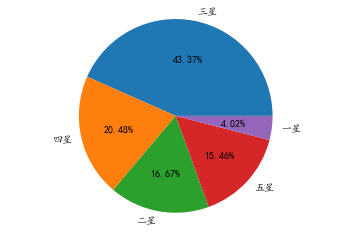

In [56]:
# 绘制 星级 饼图
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

fig4, ax4 = plt.subplots()

ax4.pie(y,labels=x,autopct='%1.2f%%')

# x,y轴长度相同
ax4.axis('equal')
plt.savefig('D:/mojito/rating_count_bing.jpg',dpi=300)

plt.show()

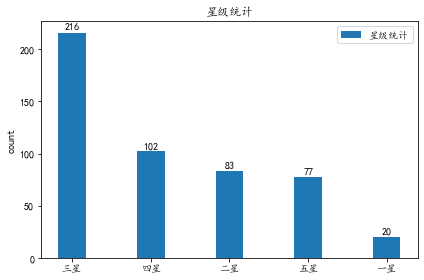

In [57]:
# 绘制柱状图
labels = x
votes = y

x = np.arange(1,6)
width = 0.35

fig5,ax5 = plt.subplots()
rects = ax5.bar(x,y,width,label = '星级统计')

ax5.set_ylabel('count')
ax5.set_title('星级统计')
ax5.set_xticks(x)
ax5.set_xticklabels(labels)
ax5.legend()

# 在柱顶加具体投票数
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax5.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



autolabel(rects)
    
fig5.tight_layout()

plt.savefig('D:/mojito/rating_count_zhu.jpg',dpi=300)

plt.show()